In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Mobilenet
(https://arxiv.org/pdf/1704.04861.pdf)  

Much smaller, lightweight and faster 
(Good for mobile devices)  
VGG16 553MB  138,000,000 Parameters  
MobileNet 17MB 4,200,000 Parameters

Trade-off in accuracy (but quite small)

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs available: ', len(physical_devices))
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs available:  0


In [ ]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalisation can be applied by setting 'normalize=True'
    """
    import itertools
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion matrix without normalisation')
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 1s 0us/step


In [26]:
def prepare_image(file):
    img_path = '../data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

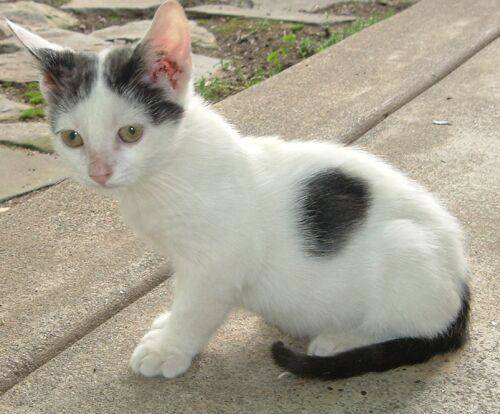

In [17]:
from IPython.display import Image
Image(filename='../data/MobileNet-samples/1.jpg', width=300, height=300)

In [39]:
preprocessed_image = prepare_image('1.jpg')
pred = mobile.predict(preprocessed_image)
top5_results = imagenet_utils.decode_predictions(pred) # Returns top 5 predictions from 1000 possible image classes
predicted_object = top5_results[0][0][1]
print("Image likely contains: ", predicted_object)

Image likely contains:  plastic_bag


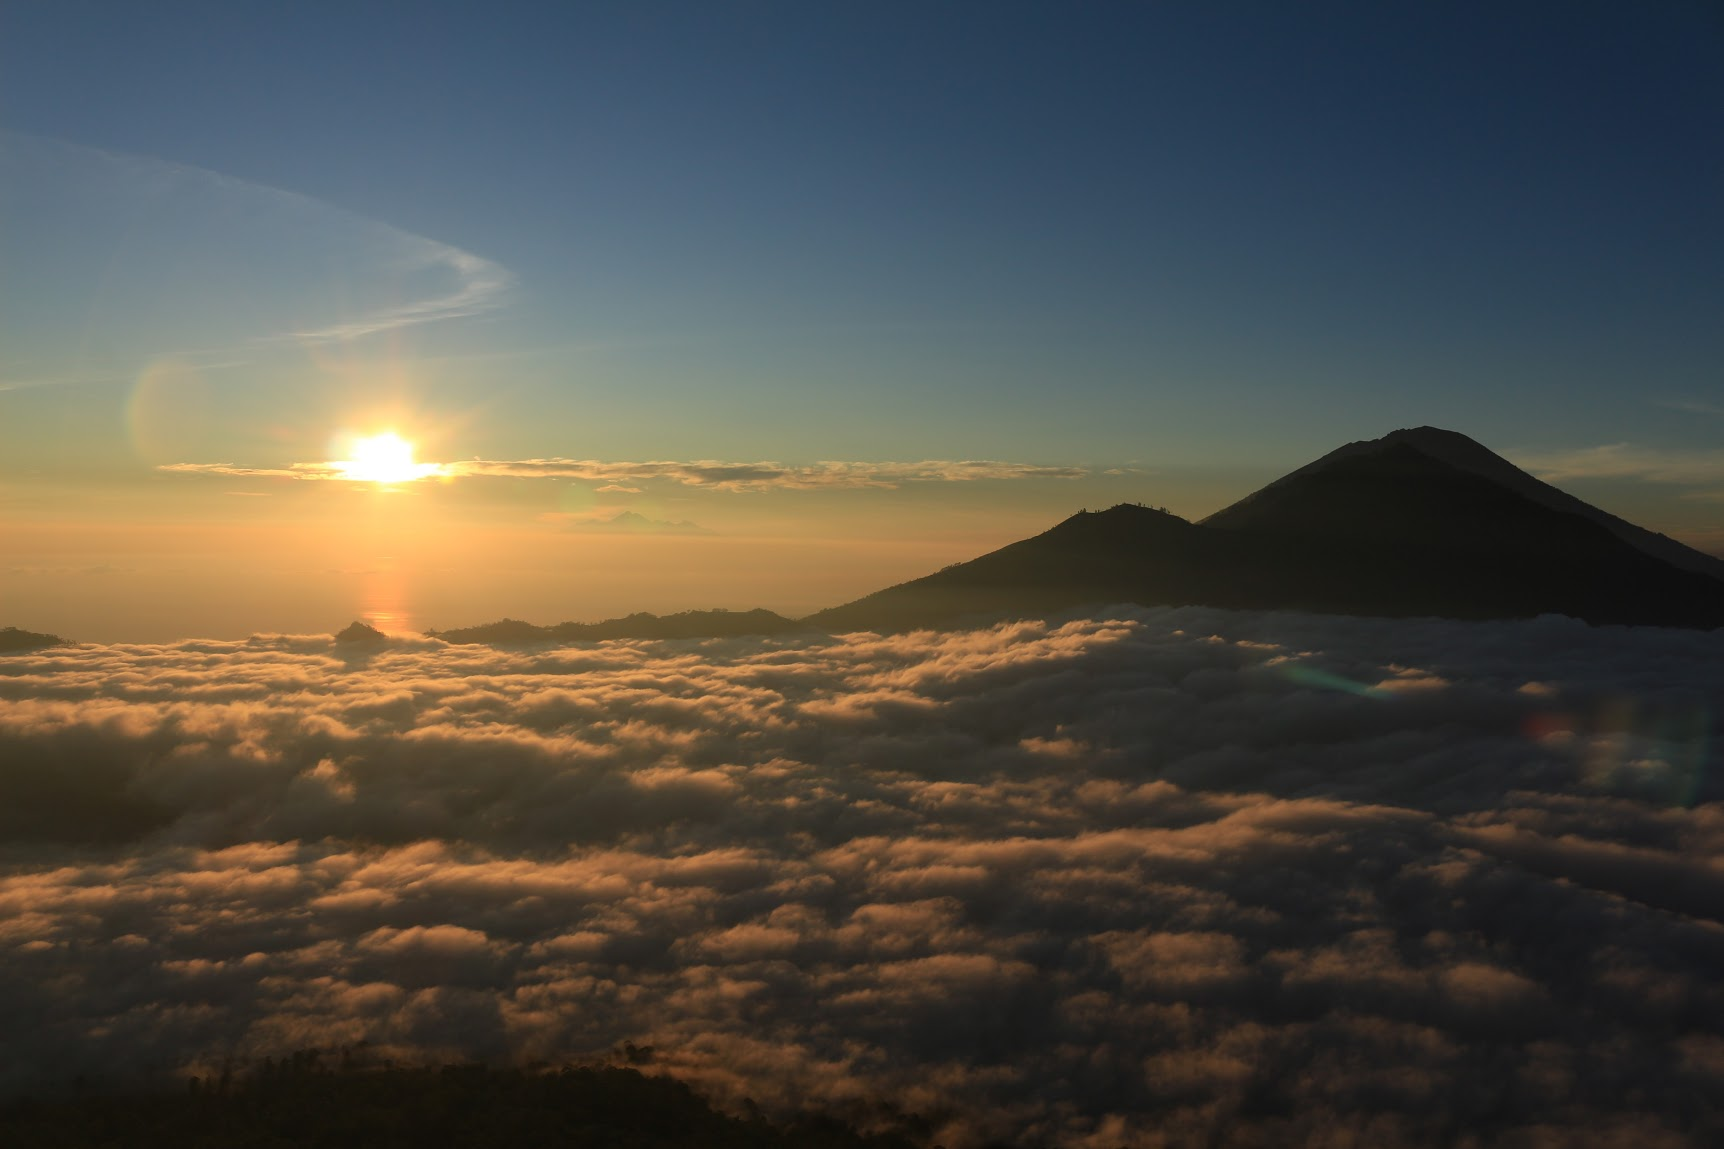

In [30]:
from IPython.display import Image
Image(filename='../data/MobileNet-samples/3.JPG', width=300, height=300)

In [40]:
preprocessed_image = prepare_image('3.JPG')
pred = mobile.predict(preprocessed_image)
top5_results = imagenet_utils.decode_predictions(pred) # Returns top 5 predictions from 1000 possible image classes
predicted_object = top5_results[0][0][1]
print("Image likely contains: ", predicted_object)

Image likely contains:  volcano


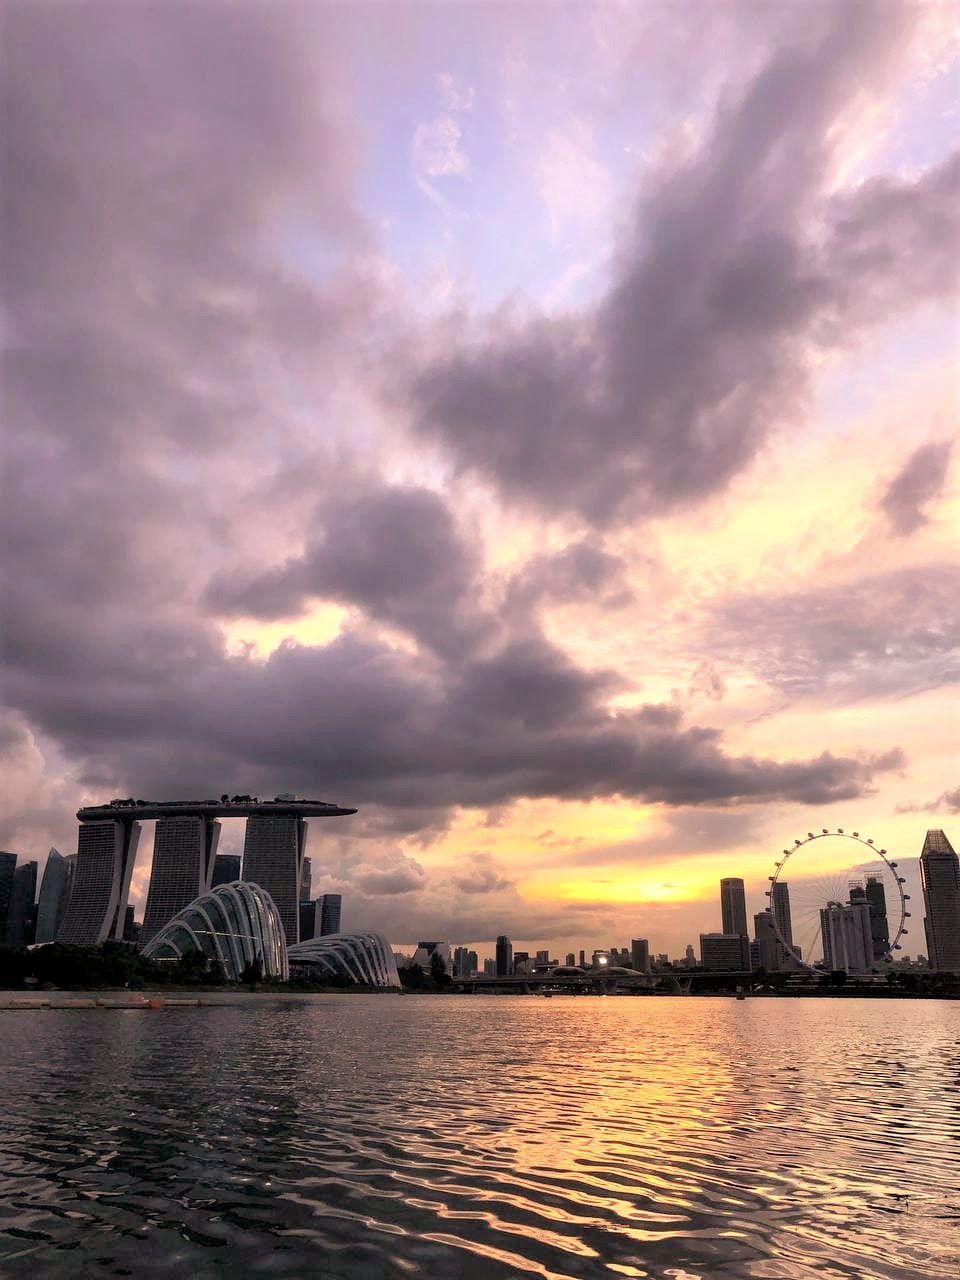

In [32]:
from IPython.display import Image
Image(filename='../data/MobileNet-samples/4.JPG', width=300, height=300)

In [33]:
preprocessed_image = prepare_image('4.JPG')
pred = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(pred) # Returns top 5 predictions from 1000 possible image classes
results

[[('n02980441', 'castle', 0.8912481),
  ('n03933933', 'pier', 0.018949643),
  ('n09332890', 'lakeside', 0.014769882),
  ('n03877845', 'palace', 0.014362445),
  ('n02859443', 'boathouse', 0.014088722)]]

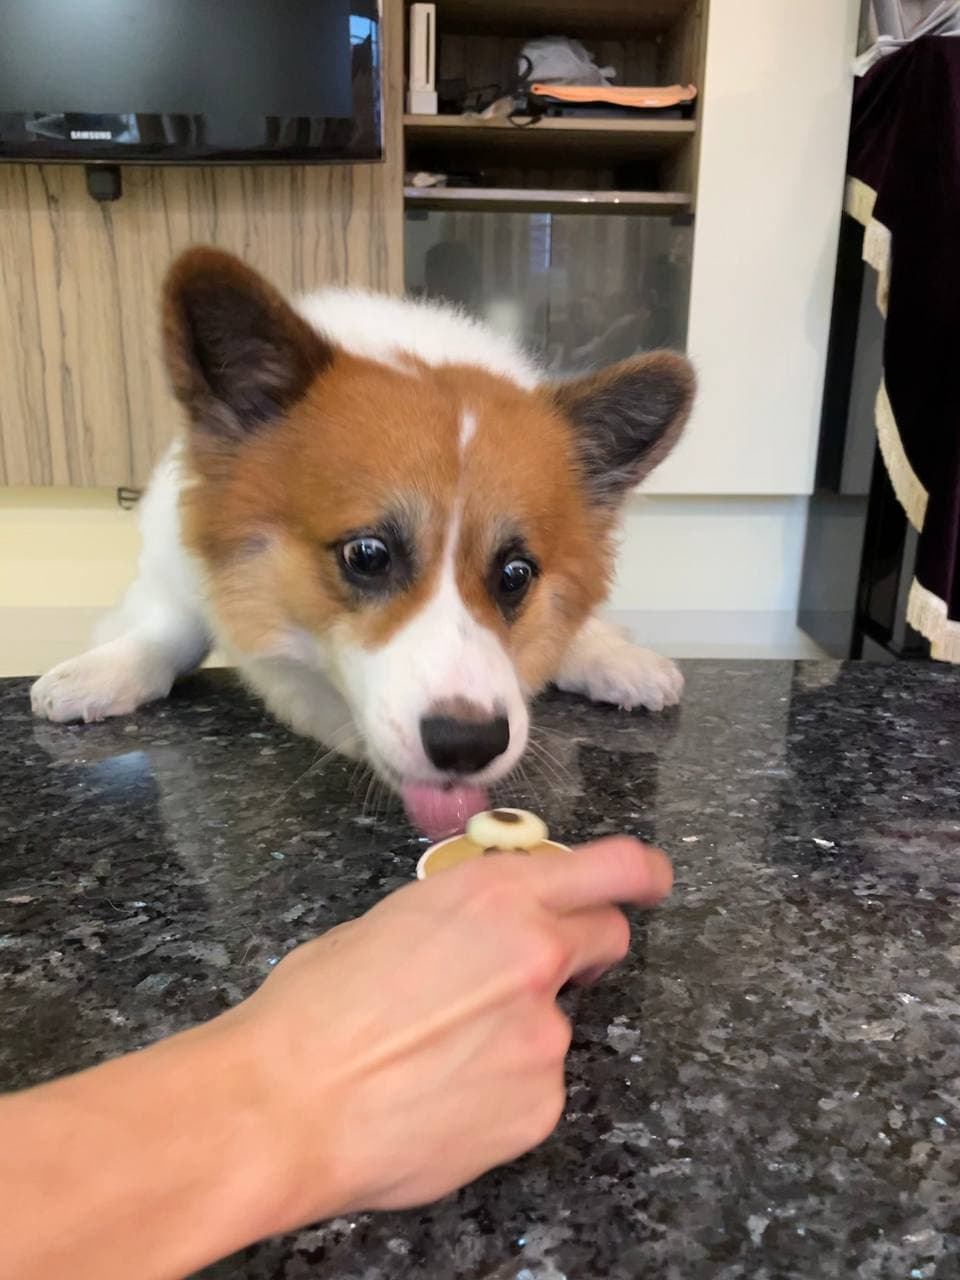

In [50]:
from IPython.display import Image
Image(filename='../data/MobileNet-samples/7.jpg', width=300, height=300)

In [53]:
preprocessed_image = prepare_image('7.jpg')
pred = mobile.predict(preprocessed_image)
top5_results = imagenet_utils.decode_predictions(pred) # Returns top 5 predictions from 1000 possible image classes
predicted_object = top5_results[0][0][1]
print("Image likely contains: ", predicted_object)
top5_results

Image likely contains:  Pembroke


[[('n02113023', 'Pembroke', 0.995802),
  ('n02113186', 'Cardigan', 0.0022406857),
  ('n02086910', 'papillon', 0.0011232898),
  ('n02105855', 'Shetland_sheepdog', 0.0003908636),
  ('n02106166', 'Border_collie', 0.000106940875)]]

In [ ]:
`